# Projekt zaliczeniowy z Uczenia Maszynowego

Skorzystałam z danych umieszczonych w bazie Kaggle: 
(https://www.kaggle.com/tongpython/cat-and-dog?fbclid=IwAR1676LnXUI57vPjYFib82PJFLGvk0StzDV1Gy7X4b_J3k9OF2-3mEE5EJ0)

W moim projekcie spróbuję nauczyć sieć rozpoznawania kotów i psów na kolorwych fotografiach. Zdjęcia z powyższej bazy były podzielone na koty i psy. Nazwy plików nazywały się kolejno cat.1, cat.2,... i dog.1, dog.2,...

Importujemy biblioteki, które będa potrzebne w dalszych częściach

In [1]:
import numpy as np
import matplotlib.pylab as plt
import os
from IPython.display import Image
import PIL.Image as image_pil

import tensorflow as tf

from IPython.display import SVG

from tensorflow.keras import layers, models


Wczytujemy dane z dysku lokalnego

Od razu zmieniamy format naszych plików na 200 x 200 pikseli. Zapisujemy też od razu informację o tym, że nasze zdjęcia są kolorowe (RGB). Informację o tym, że na zdjęciu znajduje się pies przypisaliśmy wartości 0, a dla kotów przypisaliśmy wartość 1.

In [2]:
images=[]
labels=[]
rozmiar=(200,200)


for filename in os.listdir(r'C:\Users\karol\Desktop\cat and dogstraining_set\training_set\cats'):
    img_data = image_pil.open(r'C:\Users\karol\Desktop\cat and dogs\training_set\training_set\cats/' + filename)
    img_data = np.array(img_data.resize(rozmiar))/256
    images.append(img_data.reshape((200,200,3)))
    labels.append(1)
print("Czesc 1 wczytana")
for filename in os.listdir(r'C:\Users\karol\Desktop\cat and dogs\training_set\training_set\dogs'):
    img_data = image_pil.open(r'C:\Users\karol\Desktop\cat and dogs\training_set\training_set\dogs/' + filename)
    img_data = np.array(img_data.resize(rozmiar))/256
    images.append(img_data.reshape((200,200,3)))
    labels.append(0)
print("Czesc 2 wczytana")
for filename in os.listdir(r'C:\Users\karol\Desktop\cat and dogs\test_set\test_set\cats'):
    img_data = image_pil.open(r'C:\Users\karol\Desktop\cat and dogs\test_set\test_set\cats/' + filename)
    img_data = np.array(img_data.resize(rozmiar))/256
    images.append(img_data.reshape((200,200,3)))
    labels.append(1)
print("Czesc 3 wczytana")
for filename in os.listdir(r'C:\Users\karol\Desktop\cat and dogs\test_set\test_set\dogs'):
    img_data = image_pil.open(r'C:\Users\karol\Desktop\cat and dogs\test_set\test_set\dogs/' + filename)
    img_data = np.array(img_data.resize(rozmiar))/256
    images.append(img_data.reshape((200,200,3)))
    labels.append(0)
print("Wczytane wszystko")
print("liczba zdjec:", len(images))
print("liczba kotow", sum(labels))


Czesc 1 wczytana
Czesc 2 wczytana
Czesc 3 wczytana
Wczytane wszystko
liczba zdjec: 10028
liczba kotow 5011


Wczytywane pliki nie są ze sobą wymieszane, zatem użyję funkcji mieszającej wszystkie elementy listy. Należy zadbać też o to, żeby obrazki mieszały się tak samo jak nazwy obrazków.

In [3]:
import random

z = list(zip (images, labels))
random.shuffle(z)

images, labels = zip(*z)

(test_labels, test_images, train_labels, train_images) = (labels[0:2000],images[0:2000],labels[2000:],images[2000:])



Wyświetlamy 25 zdjęć ze zbioru treningowego wraz z informacją o tym czy na zdjęciu znajduje się kot czy pies.

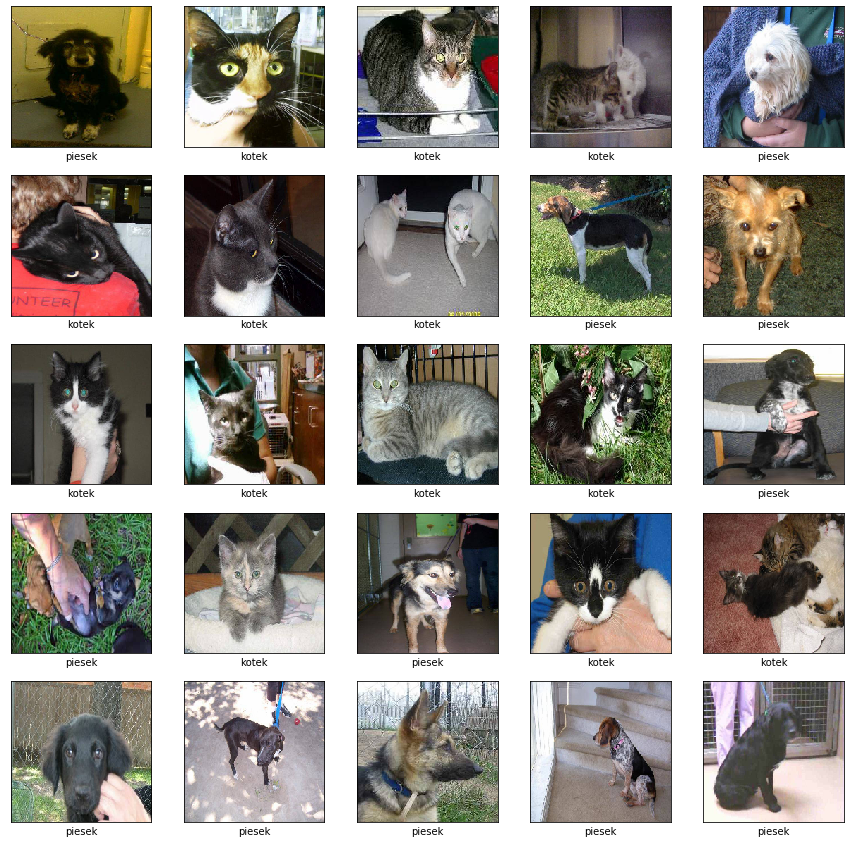

In [4]:
plt.figure(figsize=(15,15))
for numer in range(25):
    los=np.random.randint(0,len(labels))
    plt.subplot(5,5,numer+1)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(images[los])
    
    if labels[los]==1:
        plt.xlabel("kotek")
    else:
        plt.xlabel("piesek")

Zamieńmy teraz nasze dane na postać wektorową i sprawdźmy ile mamy danych testowych i treningowych

In [5]:
y_test=np.array(test_labels)
x_test=np.array(test_images)

y_train=np.array(train_labels)
x_train=np.array(train_images)


print("liczba kotkow w danych testowych:", sum(test_labels))
print("liczba pieskow w danych testowych:", len(test_labels)-sum(test_labels))

liczba kotkow w danych testowych: 1007
liczba pieskow w danych testowych: 993


Zmieniamy kształt danych

In [6]:
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)

# Przygotowujemy sieć i kompilujemy ją

In [8]:
#K.set_image_data_format('channels_last')

model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
fit = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Train on 8028 samples, validate on 2000 samples
Epoch 1/20
8028/8028 [==============================] - 250s 31ms/sample - loss: 0.8143 - accuracy: 0.5402 - val_loss: 0.6784 - val_accuracy: 0.5645
Epoch 2/20
8028/8028 [==============================] - 37s 5ms/sample - loss: 0.6515 - accuracy: 0.6233 - val_loss: 0.6390 - val_accuracy: 0.6460
Epoch 3/20
8028/8028 [==============================] - 32s 4ms/sample - loss: 0.5441 - accuracy: 0.7215 - val_loss: 0.6225 - val_accuracy: 0.6715
Epoch 4/20
8028/8028 [==============================] - 33s 4ms/sample - loss: 0.3148 - accuracy: 0.8631 - val_loss: 0.8554 - val_accuracy: 0.6775
Epoch 5/20
8028/8028 [==============================] - 33s 4ms/sample - loss: 0.0710 - accuracy: 0.9756 - val_loss: 1.7344 - val_accuracy: 0.6640
Epoch 6/20
8028/8028 [==============================] - 32s 4ms/sample - loss: 0.0110 - accuracy: 0.9973 - val_loss: 2.1399 - val_accuracy: 0.6750
Epoch 7/20
8028/8028 [==============================] - 32s 4ms/samp

Wyraźnie widzimy, że sieć ta nie jest najlepsza. Nasza precyzja na zbiorze treningowym szybko osiąga maksimum i utrzymuje się ono do samego końca uczenia. Podobnie jest na zbiorze testowym - wartości utrzymują się na tym samym poziomie. Ponadto wybraliśmy funkcję optymalizującą 'adam', która nie jest dobra dla złożonych danych (takie jak nasze), co też wpływa na jakość uczenia sieci. Biorąc te wszytskie parametry pod uwagę, wnioskujemy, że sieć jest przeuczona.

Zmieńmy zatem architekturę sieci

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape = (200, 200, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(16, (3, 3), input_shape = (200, 200, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [24]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 
fit = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Train on 8028 samples, validate on 2000 samples
Epoch 1/50
8028/8028 [==============================] - 10s 1ms/sample - loss: 0.6917 - accuracy: 0.5262 - val_loss: 0.6925 - val_accuracy: 0.5050
Epoch 2/50
8028/8028 [==============================] - 10s 1ms/sample - loss: 0.6890 - accuracy: 0.5483 - val_loss: 0.6882 - val_accuracy: 0.5645
Epoch 3/50
8028/8028 [==============================] - 10s 1ms/sample - loss: 0.6852 - accuracy: 0.5658 - val_loss: 0.6814 - val_accuracy: 0.6010
Epoch 4/50
8028/8028 [==============================] - 10s 1ms/sample - loss: 0.6797 - accuracy: 0.5749 - val_loss: 0.6852 - val_accuracy: 0.5440
Epoch 5/50
8028/8028 [==============================] - 10s 1ms/sample - loss: 0.6728 - accuracy: 0.5859 - val_loss: 0.6831 - val_accuracy: 0.5515
Epoch 6/50
8028/8028 [==============================] - 10s 1ms/sample - loss: 0.6683 - accuracy: 0.5891 - val_loss: 0.6564 - val_accuracy: 0.6155
Epoch 7/50
8028/8028 [==============================] - 10s 1ms/sample

W tym przypadku uzyskujemy o wiele lepsze wyniki. Widzimy, że precyzja na zbiorze treningowym itestowym rośnie wraz z ilością epok. Zmieniliśmy też funkcję optymalizującą, która jest używana do danych bardziej złożonych i wyraźnie zauważamy zmiany. Gdybyśmy zwiększyli jeszcze liczbę epok, prawdopodobnie precyzja byłaby jeszcze lepsza, a co za tym idzie sieć byłaby jeszcze lepiej nauczona.

Zobaczmy jak prezentuje się historia funkcji błędu dla naszego modelu

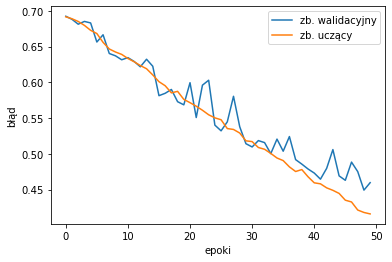

In [25]:
plt.figure()
plt.plot(fit.history['val_loss'])
plt.plot(fit.history['loss'])
plt.legend(('zb. walidacyjny', 'zb. uczący'))
plt.xlabel('epoki')
plt.ylabel('błąd')
plt.show()

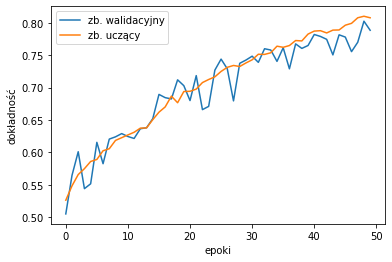

In [27]:
plt.figure()
plt.plot(fit.history['val_accuracy'] )
plt.plot(fit.history['accuracy'])
plt.legend(('zb. walidacyjny', 'zb. uczący'))
plt.xlabel('epoki')
plt.ylabel('dokładność')
plt.show()

Walidacja powinna być wyższa na zbiorze testowym. Gdyby było odwrotnie, moglibyśmy przypuszczać, że nasza sieć jest przeuczona.

In [28]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Błąd na zbiorze testowym: %.2f%%" % (100-scores[1]*100))

Błąd na zbiorze testowym: 21.15%


In [54]:
y_pred = model.predict(x_test)

Przeanalizujmy teraz macierz pomyłek na zbiorze testowym, ale najpierw wyświetlmy sobie przewidywania dla pierwszych dziesięciu danych testowych. Tam, gdzie mamy największą liczbę w wektorze, tam znajduje się klasa, która przydzieliła maszyna danemu obrazkowi ze zbioru testowego.

Na diagonali macierzy znajduje się łączna suma dobrych przewidywań maszyny dla każdej z klas, natomiast w miejscach poza diagonalą znajdują się źle zaklasyfikowane zdjęcia.

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, np.argmax(y_pred,axis = 1))
print(cm)

[[734 259]
 [164 843]]


Wyraźnie widzimy, że jest znacznie więcej dobrych przedywań niż złych.

Pokażmy źle zaklasyfikowane zdjęcia

In [87]:
czy_zgodne=np.argmax(y_pred,axis = 1) == y_test[:,0]

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


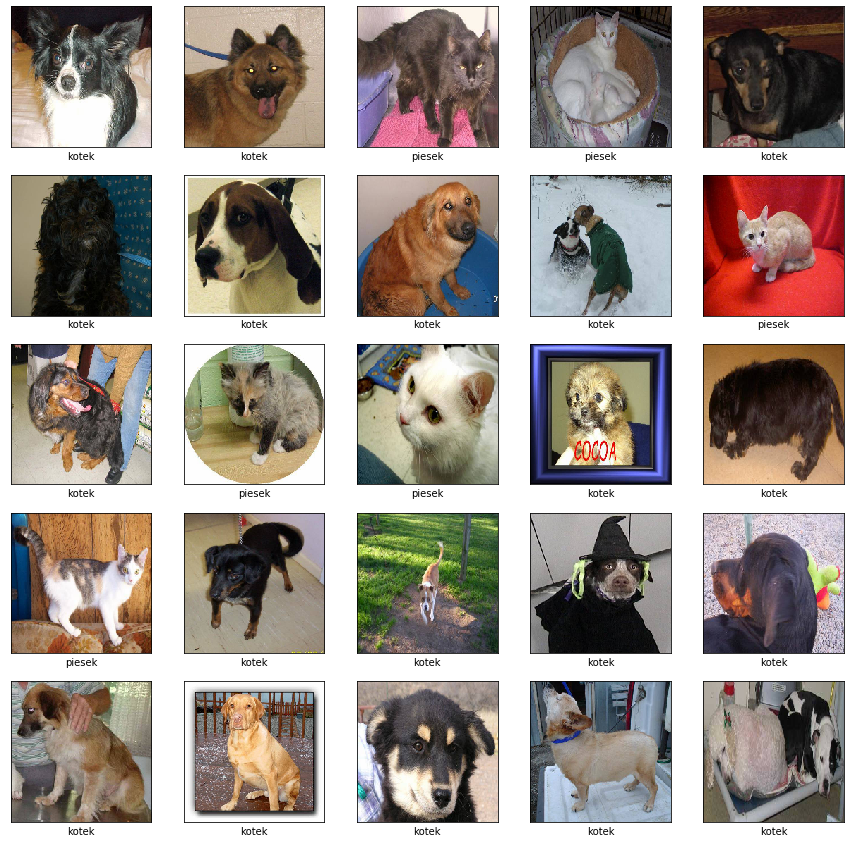

In [98]:
liczba_obr=0
i=0
plt.figure(figsize=(15,15))
while liczba_obr<25:
    plt.subplot(5,5,liczba_obr+1)
    plt.xticks([])
    plt.yticks([])
    if czy_zgodne[i]==False:
        plt.imshow(x_test[i])
        liczba_obr+=1
        if np.argmax(y_pred,axis = 1)[i]==1:
            plt.xlabel("kotek")
        else:
            plt.xlabel("piesek")
    i+=1
        

Uzyskaliśmy dość wysoki błąd na zbiorze testowym. Gdybyśmy zwiększyli liczbę epok, napewno byłby on mniejszy. Analizując macierz pomyłek widzimy wyraźnie, że mamy znacznie mniej przypadków złej klasyfikacji względem całego zbioru testowego. Wykresy natomiast pokazują nam, że sieć nie została przeuczona.

Zatem, nasza sieć dobrze nauczyła się rozróżniać psy i koty na kolorowych fotografiach.